In [98]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [100]:
df = pd.read_csv(os.path.join("data", "adult.csv"))
df.replace("?", np.nan, inplace=True)
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,36
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,40
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,38


# Task 1
Print the count of men and women in the dataset.

In [101]:
"Count of men = {}, count of women = {}".format(len(df[df["sex"] == "Male"]), len(df[df["sex"] == "Female"]))

'Count of men = 21790, count of women = 10771'

"# Task 2
Find the average age of men in dataset

In [102]:
"Average age of men = {}".format(int(df[df["sex"] == "Male"].age.mean()))

'Average age of men = 39'

# Task 3
Get the percentage of people from Poland (native-country)

In [103]:
"Percentage of people from Poland = {}%".format(round(len(df[df["native-country"] == "Poland"]) / len(df) * 100, 2))

'Percentage of people from Poland = 0.18%'

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [104]:
mean_std_by_salary = df.groupby("salary")["age"].agg(["mean", "std"])
mean_std_by_salary

,mean,std
salary,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [105]:
higher_education_levels = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
people_without_higher_education_high_salary = df[(df["salary"] == ">50K") & ~(df["education"].isin(higher_education_levels))]

"There are {} people without higher education and with >50k salary".format(len(people_without_higher_education_high_salary))

'There are 3306 people without higher education and with >50k salary'

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [106]:
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [107]:
df["marriage_status"] = df["marital-status"].apply(lambda status: "Married" if status.startswith("Married") else "Not Married")

comparison_result = df[df["sex"] == "Male"].groupby("marriage_status")["salary"].value_counts(normalize=True).unstack()
comparison_result

salary,<=50K,>50K
marriage_status,,
Married,0.559486,0.440514
Not Married,0.915505,0.084495


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [108]:
max_hours_per_week = df["hours-per-week"].max()
people_with_max_hours = df[df["hours-per-week"] == max_hours_per_week]

"Maximum hours per week = {}, Number of people working the same amount of hours per week = {}".format(max_hours_per_week, len(people_with_max_hours))

'Maximum hours per week = 99, Number of people working the same amount of hours per week = 85'

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

Correlation Matrix:
                     age  hours-per-week  salary K$
age             1.000000        0.068756   0.201774
hours-per-week  0.068756        1.000000   0.196916
salary K$       0.201774        0.196916   1.000000


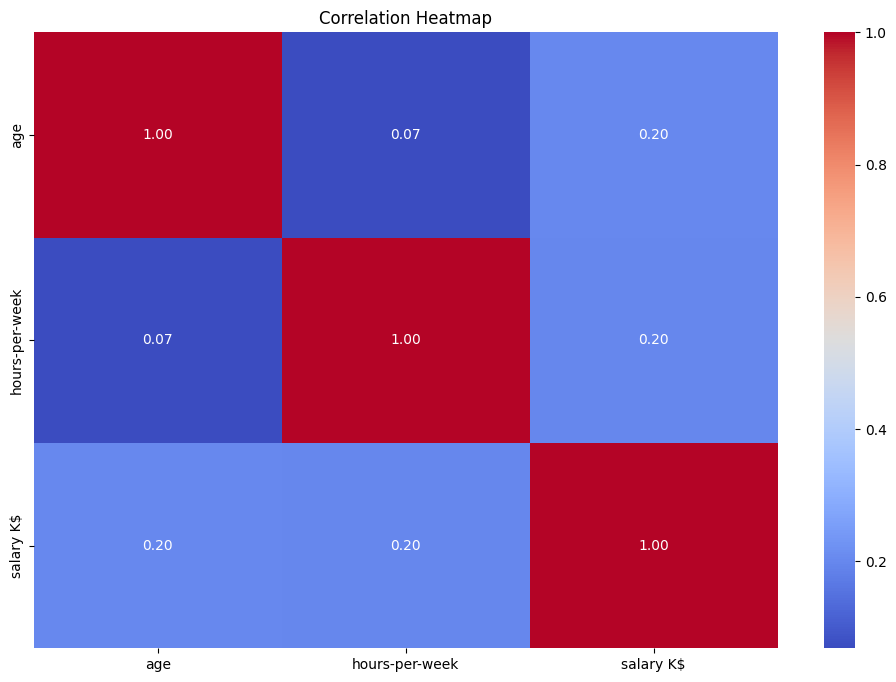

In [109]:
correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()